# Numerical Practicum: HW1 
## Intro - Recap of Preliminaries

In [95]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
# from sympy import Function, dsolve, Eq, Derivative, symbols
import sympy as sp
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
import numpy as np
from scipy.integrate import solve_ivp
print("Succesfully imported %s"%solve_ivp.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported scipy.optimize
Succesfully imported solve_ivp


Our goal: Recap of prerequisites. Prepare for forthcoming assignments. In particular 
1. spatial discretization of first and second order derivatives in space and time using the finite difference method: used in solving Poisson-Boltzmann equation and reaction-diffusion systems; 
2. time-integration methods using explicit and implicit time-integration methods: used in solving reaction-diffusion problems and chemical reactors; 
3. non-linear system solvers using derivative-based methods including techniques to compute the Jacobian: used in Poisson-Boltzmann equation; 
4. solving linear systems solvers using direct solution methods: used in data handling methods and large scale partial differential equation problems; 

Out-of-scope: to be defined; 

References:  
1. to be inserted 

Tentative deadline for students to hand-in their assignment: September 30th; 

Formative assessment: Discussion of how assignment went after grading of assignments;

## Section 1/6: Linear Boundary Value Problems on the Interval

Assignment in various sections on solving boundary value problem numerically.
1. Intro into this assignment - explain what the goals are; 
2. State problem to solve. Boundary value problem for the Poisson equation (diffusion with constant coefficient only) on the unit interval with Dirichlet and Neumann boundary conditions;
3. Generate analytical reference solution. Use either by pen-and-paper or using symbolic computations;
4. Generate numerical solution using built-in numerical method (e.g. shooting implemented in the scipy.integrate.solve_bvp() function) 
5. Discretize the problem in space. Introduce into finite difference method for the boundary value problem. Treatment of interior and boundary nodes. Linear system formulation: matrix and right-hand side vector. Make sure to provide sufficient references; 
6. Solve linear system using LU decomposition of the coefficient matrix; compare LU with explicit matrix inverse; 
7. Give physical interpretation of solution obtained (steady state of diffusion of drop of dye in water);  
8. Add linear reaction term. Revisit all previous steps;

### Problem statement 

We aim at solving the scalar linear  non-homogeneous diffusion equation on the interval $0 \leq x \leq 1$. Our objective is to numerically approximate the function $u(x)$ that is the solution of the following problem.

\begin{equation}
 - \frac{\text{d}^2u}{\text{d}x^2} = f(x) \tag{1}
\end{equation}

where the terms in the left-hand side and right-hand will be referred to as the "diffusion term" and the "source term", respectively. 

Find the function $u(x)$ that is the solution of the differential equation written above, supplied with the following non-homogeneous Dirichlet boundary condition in $x = 0$ and homogeneous Dirichlet boundary condition in $x = 1$:

\begin{equation}
 u(x=0)=1  \text{          and         }  u(x=1)=0 \tag{2}
\end{equation}

Neumann (and/or Robin) boundary conditions can be introduced as well. 

### Concepts Introduced in this Section
1. linear ordinary differential equation; 
2. boundary value problem;
3. finite difference discretization on a uniform mesh; 
4. linear system of equations ands its numerical solution; 

### Analytical Reference Solution 
The differential equation $(1)$ supplied with the boundary conditions $(2)$ can be solved analytically by integrating $f(x)$ with respect to $x$ twice and using the boundary conditions to determine the constants of integration. Choosing for instance $f(x) = x^2$, one finds the solution:

\begin{equation}
 u(x)= ... \tag{3}
\end{equation}

Plot the source function $f(x)$ and the solution $u(x)$ on the same graph. Use a left and right vertical axis. Clearly label axes. Insert a legend. 

#### Exercises
1. choose another expression for $f(x)$, i.e., $f(x) = \sin(\pi \,x)$; 
2. change value enforced by the Dirichlet boundary conditins; 
3. switch to Neumann boundary conditions; 

### Solve Symbolically using sympy

Solve symbolically using the [sympy.dsolve() function](https://docs.sympy.org/latest/modules/solvers/ode.html). Insert reference to Python introduction. More. Same exercises as above.

In [4]:
x = np.linspace(0,1,3)
print(x)

[0.  0.5 1. ]


The computed solution is -x**4/12 + x/12


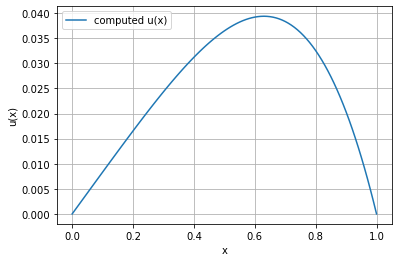

In [5]:
#..define symbol x (spatial coordinate), function f (source) and function u (unknown)
x = sp.symbols('x')
f = sp.Function("f")
u = sp.Function("u") 

#..define the expression for the right-hand side function 
f = x**2 

#..solve the differential equation - u''(x) = f(x) + BC symbolically
computed = sp.dsolve(sp.Derivative(u(x), x, x) + f,ics={u(0):0,u(1):0})

#..print the expression for the symbolic solution 
print("The computed solution is", computed.rhs)

#..to switch from symbolic to numerical computation
#..we need to perform a "lambdification" of the right-hand side of the solution
#..the function created accepts vector arguments 
computed_sol = sp.lambdify(x, computed.rhs)

#..sample the lambda expression for the computed solution 
N = 100; Np1 = N+1;  
xvec = np.linspace(0,1,Np1)
computed_sol_vec = computed_sol(xvec)

#..plot the computed solution 
plt.plot(xvec,computed_sol_vec,label='computed u(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='best')
plt.grid()
plt.show()

### Solve Numerically Using Build-In Function in Scipy

Solve numerically using the [scipy.integrate.solve_bvp() function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html). This function implements a shooting method. More explanation on the rhs-function. 

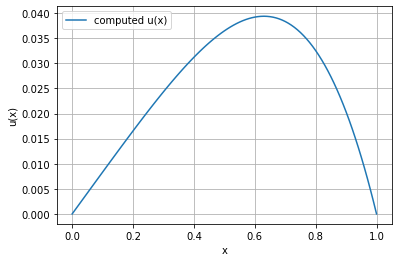

In [6]:
def righthandsidefunction(x, u):
    return np.vstack((u[1], -x**2))

def boundaryconditions(ua, ub):
    return np.array([ua[0], ub[0]])

N = 100; Np1 = N+1;
xvec = np.linspace(0,1,Np1)

ustart = np.zeros((2, xvec.size))

computed = scipy.integrate.solve_bvp(righthandsidefunction, boundaryconditions, xvec, ustart)

plt.plot(xvec,computed.sol(xvec)[0],label='computed u(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='best')
plt.grid()
plt.show()

### Solving a Linear System in Scipy 
Put example here. 

### Solve Numerically using Home-Brewed Finite Difference Method 
Next we proceed with the finite difference approximation.

#### Mesh 
Assume that the interval $0 < x < 1$ is discretized by an uniform mesh consisting of $N$ elements with mesh width $h = 1=N$ and vertices $x_{i} = (i-1)h$, where $i$ runs from 1 to $N + 1$. This enumeration includes the end points of the interval, that is, $x_{1} = 0$ and $x_{N+1} = 1$. The grid nodes can then be denoted by

\begin{equation}
 G_h=\Bigg({x_{i}|x_{i}=(i-1)h; h=\frac{1}{N}, 1\leq i \leq N+1}\Bigg) \tag{4}
\end{equation}


Let $u^{h}$ denote the vector with $N+1$ components such its $i$-th component $u^{h}_{i}$ approximates the exact solution $u(x)$ in the $i$-th node.

#### Discretization of the diffusion term in the interior nodes
The differential equation holds in particular for all of the internal nodes, that is, we have that

\begin{equation}
 -\frac{\text{d}^2u}{\text{d}x^2}\Bigg|_{x=x_{i}} = f(x=x_i) \text{  for all  } 2\leq i \leq N    \tag{5}
\end{equation}


To approximate the diffusion term, we proceed as in the tutorial and use a finite difference formula to discretize the second derivative $\frac{\text{d}^2u}{\text{d}x^2}\Bigg|_{x=x_{i}} = u''(x_{i})$ as follows

\begin{equation}
 u''(x_{i})\approx\frac{u'(x_{i}+h/2)-u'(x_{i}-h/2)}{h}    \tag{6}
\end{equation}


\begin{equation}
 u''(x_{i})\approx\frac{u(x_{i+1})-2u(x_{i})+u(x_{i-1})}{h^2}    
\end{equation}

(Using Taylor polynomials it can be shown that the local truncation error is of second order in $h$). The finite difference discretization thus leads to the following stencil for the approximation of $-ε\frac{\text{d}^2u}{\text{d}x^2}\Bigg|_{x=x_{i}}$ (beware of the minus-sign and the factor $-ε$)

\begin{equation}
 \frac{1}{h^2}\Bigg[\begin{matrix}-ε &  2ε & -ε\\ x_{i-1} & x_{i} & x_{i+1} \end{matrix}\Bigg]       \text{[central approximation for difussion]} \tag{7}
\end{equation}


This stencil implies that each node $x_{i}$ is coupled to its left ($x_{i-1}$) and right neighbour ($x_{i+1}$) with a weight of $-\frac{ε}{h^2}$.


#### Discretization of the convection term in the interior nodes 

The convective term can be approximated in two ways. The first option is to use a central approximation on neighboring nodes

\begin{equation}
 u'(x_{i})\approx\frac{u(x_{i+1})-u(x_{i-1})}{2h}   \tag{8} 
\end{equation}

leading to the stencil

\begin{equation}
 \frac{1}{2h}\Bigg[\begin{matrix}-1 &  0 & 1\\ x_{i-1} & x_{i} & x_{i+1} \end{matrix}\Bigg]       \text{[central approximation for convection]} \tag{9}
\end{equation}


(The local approximation error of this scheme is of second order in $h$. This second order comes however at an expensive that we discover later in this assignment.) The second option is to approximate the first order
derivative using the backward finite difference approximation


\begin{equation}
 u'(x_{i})\approx\frac{u(x_{i})-u(x_{i-1})}{h}   \tag{10} 
\end{equation}

In this approximation information in $x_{i-1}$ is used to approximate the derivative in $x_{i}$. In this exercise the convective term propagates information from the left to the right. The node $x_{i-1}$  thus lies upstream from $x_{i}$. The above finite difference approximation is therefore referred to as the upwind approximation. This approximation leads to the stencil


\begin{equation}
 \frac{1}{h}\Bigg[\begin{matrix}-1 & 1 & 0\\ x_{i-1} & x_{i} & x_{i+1} \end{matrix}\Bigg]       \text{[upwind approximation for convection]} \tag{11}
\end{equation}

(The local approximation of this scheme is only of first order in h. Despite this lower order of accuracy, this scheme has a distinct advantage that we will discover later in this assignment.) The stencil of the diffusive and the convective term should be added to obtain the stencil for the coefficient matrix $A^h$ corresponding to the finite difference scheme.

#### Discretization in the left and right boundary condition 
Verify that the Dirichlet boundary condition in the left and right end point can be enforced by requiring that

\begin{equation}
 u_{1}=1 \text{          and that         }       u_{N+1}=0  \tag{12}
\end{equation}

The finite difference stencil in the left and right end point thus reduces to

\begin{equation}
 \Bigg[\begin{matrix}1 & 0 & 0\\ x_{1} & x_{2} & x_{3} \end{matrix}\Bigg]   \text{          and         }    \Bigg[\begin{matrix}0 & 0 & 1\\ x_{N-1} & x_{N} & x_{N+1} \end{matrix}\Bigg] \tag{13}
\end{equation}

The non-homogeneous contribution in the left boundary condition (the term equal to 1) will be placed in the first component of the right-hand vector. The other components of this right-hand vector will remain equal to one.

#### Exercise

Assume $h = 1/3$ (and thus $N=3$) and $ε = 0.5$. Assume that the central difference scheme $(8)$ is used to approximate the convective term in $(1)$. Determine the size of the global matrix $A^h$ and the global right-hand vector $f$. Give all the elements of this matrix and vector with pen (or pencil) and paper.

In [36]:
#4x4 matrix
#diffusie matrix en convectie matrix opstellen en die bij elkaar optellen
#stencils geven aan hoe de consstructie eruit zou moeten zien maar het zijn niet the matrices zelf

h = 1/3
A = np.array([[1,0,0,0],
             [-1/(2*(h**2)) - 1/(2*h), 1/h**2, -1/(2*(h**2)) + 1/(2*h), 0],
             [0, -1/(2*(h**2)) - 1/(2*h), 1/h**2, -1/(2*(h**2)) + 1/(2*h)], 
             [0,0,0,1]])
print ('Matrix Ah is',A)

f = np.array([[1],[0],[0],[0]])
print ('Global right hand vector is', f)

Matrix Ah is [[ 1.  0.  0.  0.]
 [-6.  9. -3.  0.]
 [ 0. -6.  9. -3.]
 [ 0.  0.  0.  1.]]
Global right hand vector is [[1]
 [0]
 [0]
 [0]]


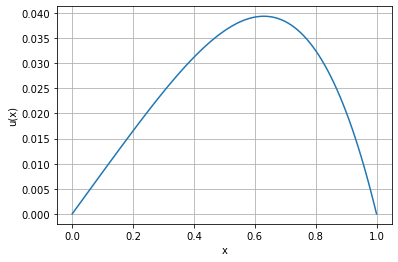

In [7]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

N = 100; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,N+1)

# define matrix 
A = poisson_1d(N)

# define right-hand side vector 
fvec = xvec**2
fvec[0] = 0; fvec[-1] = 0;

# solve linear system for u 
u = np.linalg.solve(A,fvec)

plt.figure()
plt.plot(xvec, u, label='Computed solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid()
plt.show()

### Application in computational chemical engineering: Diffusion
Graph u and f on the same plot with different vertical axes. 

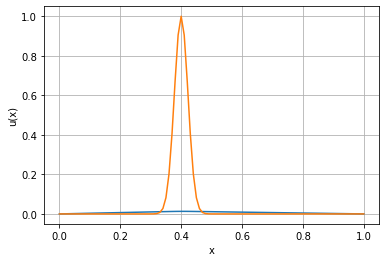

In [10]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

N = 100; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,Np1)

# define matrix 
A = poisson_1d(N)

# define right-hand side vector 
fvec = np.exp(-(xvec-.4)**2/1e-3)
fvec[0] = 0; fvec[-1] = 0;

# solve linear system for u 
u = np.linalg.solve(A,fvec)

plt.figure()
plt.plot(xvec, u, label='Computed solution') 
plt.plot(xvec, fvec, label='Computed solution') 
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid()
plt.show()

#### Exercises
1. change location, amplitude and spread of the source;
2. add more sources; 
3. add sources and sinks; 

### References:  
1. [One-Dimensional Finite Difference Method for BVP in Python (elementary, online book)](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html)
2. [Langtangen and Svinge: Finite Difference Computing with PDE (advanced, book)](https://library.oapen.org/bitstream/id/47d73f10-e062-45a7-8760-37b3aade3293/1002196.pdf) 
3. [LeVeque: Finite Difference Methods for Partial Differential Equations (advanced, notes)](https://edisciplinas.usp.br/pluginfile.php/41896/mod_resource/content/1/LeVeque%20Finite%20Diff.pdf) 

## Section 2/6: Extension to Non-Linear Boundary Value Problems on the Interval

1. Add non-linear reaction term. Explain non-linear scalar problem with references. What is a good example? Revisit previous steps. Recognize the problem this time to be non-linear. Identify problem as a root-finding problem in N dimensions. Compute the Jacobian. Solve non-linear system using Newton-Raphson method. Compare with reference solution. Give physical interpretation; 

### Problem Formulation 

### Concepts Introduced 

### Linear Problem: Solve Numerically Using Scipy
Solve numerically using the [scipy.integrate.solve_bvp() function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html). This function implements a shooting method. More explanation on the rhs-function. 

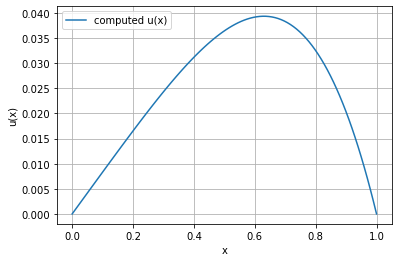

In [2]:
def righthandsidefunction(x, u):
    return np.vstack((u[1], -x**2))

def boundaryconditions(ua, ub):
    return np.array([ua[0], ub[0]])

N = 100; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,Np1)

ustart = np.zeros((2, xvec.size))

computed = scipy.integrate.solve_bvp(righthandsidefunction, boundaryconditions, xvec, ustart)

plt.plot(xvec,computed.sol(xvec)[0],label='computed u(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='best')
plt.grid()
plt.show()

### Solve Non-Linear Problem in One Variable Using SciPy 
Put tutorial example here. 

### Linear Problem: Solve Numerically using Home-Brewed Finite Difference Method

We discretize using finite differences and solve the non-linear problem using a Newton method implemented in [scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root). Our goal is to arrive at a solution method that allows to treat two and three-dimensional problems. For linear systems, we pass matrix and rgh vector to solve function. For non-linear problems, we pass function for residual and its Jacobian to the solve function.  

In [57]:
# sandbox 
t = np.ones(3)
print(t)

[1. 1. 1.]


  number of function evaluation =  205


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_root.py:162: RuntimeWarning: Method lm does not accept callback.
  RuntimeWarning)


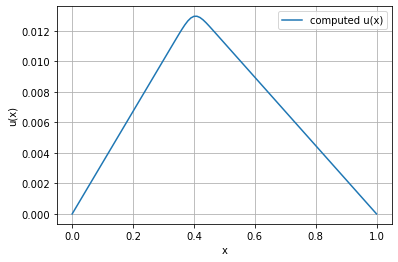

In [75]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def residual(u,A,fvec):
    r = A@u - fvec 
    return r 

def residualprime(u,A,fvec): 
    return A

iter = 0; 

def callbackFunc(u,r):
    global iter
    print('{0:4d} {1: 3.6e}'.format(iter, np.linalg.norm(r)))
    iter += 1
    
N = 100; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,Np1)

# define matrix 
A = poisson_1d(N)

# define right-hand side vector 
fvec = np.exp(-(xvec-.4)**2/1e-3)
fvec[0] = 0; fvec[-1] = 0;

# set initial guess: should the initial guess satisfy the boundary conditions?  
ustart = np.ones(Np1);

t = A@ustart 

# seperately test call to the residual function 
r = residual(ustart,A,fvec)

# solve non-linear problem
#computed = optimize.root(residual,ustart,args=(A,fvec),jac=residualprime, method='lm', callback=callbackFunc)
computed = optimize.root(residual,ustart,args=(A,fvec),jac=False, method='lm', callback=callbackFunc)
print('  number of function evaluation = ', computed.nfev)
#print('  number of jacobian evaluation = ', computed.njev)

plt.plot(xvec,computed.x,label='computed u(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [66]:
computed.keys()

dict_keys(['x', 'message', 'status', 'success', 'cov_x', 'fun', 'nfev', 'njev', 'fjac', 'ipvt', 'qtf'])

In [48]:
computed.keys()
print(computed.r)

[-1.00000991e+04  2.00295989e+04 -1.00002109e+04 ... -5.03012760e+02
  5.25253991e+02 -7.07863040e-01]


References:  
1. [Newton's Method in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html)
2. [Newton's Method on wiki](https://en.wikipedia.org/wiki/Newton%27s_method)
3. [Jacobian on wiki](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)